# TP : Régression linéaire, Louis Martinez

In [59]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import t # Student

In [60]:
# Read data from invest.txt and display the first 5 observations
url = "invest.csv"

df = pd.read_csv(url, sep =' ')

df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


Slope : 0.155, Intercept : 5.03
Standard deviation : 713.117, Determination coefficient : 0.831


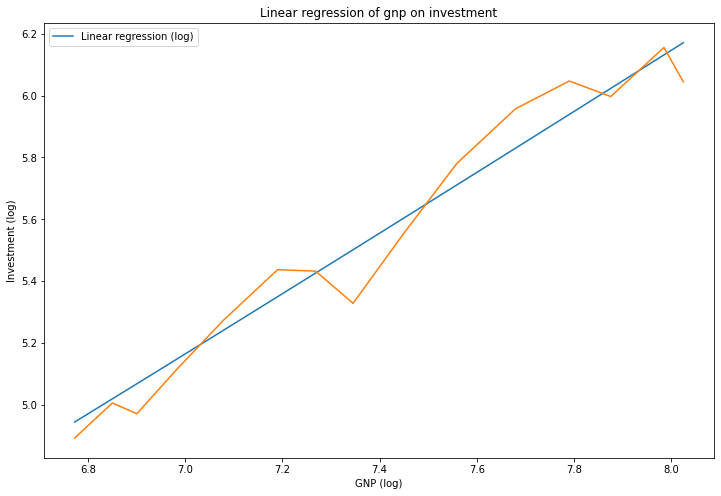

In [61]:
gnp = df["gnp"].to_numpy()
invest = df["invest"].to_numpy()



gnp_mean = np.mean(gnp)         # x
invest_mean = np.mean(invest)   # y

slope = ((gnp - gnp_mean) * (invest - invest_mean)).sum() / ((gnp - gnp_mean)**2).sum()
intercept = invest_mean - slope * gnp_mean

print(f'Slope : {np.round(slope, 3)}, Intercept : {np.round(intercept, 3)}')

x = np.linspace(gnp[0], gnp[-1], len(gnp))
y = slope * x + intercept

# Computation of standard deviation
standard_deviation = np.sqrt(np.mean((gnp - gnp_mean)**2))

# Computation of determination coefficient
deter_coef = 1 - ((y - invest)**2).sum()/((invest - invest_mean)**2).sum()

print(f'Standard deviation : {np.round(standard_deviation, 3)}, Determination coefficient : {np.round(deter_coef, 3)}')

plt.figure(figsize=(12, 8))
plt.title('Linear regression of gnp on investment')
plt.plot(np.log(x), np.log(y), label='Linear regression (log)')
plt.plot(np.log(gnp), np.log(invest))
plt.xlabel('GNP (log)')
plt.ylabel('Investment (log)')
plt.legend()
plt.show()

In [62]:
# Significance of the slope

# Estimation of noise variance
sigma_2 = 1/(len(gnp)-2) * ((invest - (intercept + slope * gnp))**2).sum()

# Computation of slope variance
slope_var = sigma_2 / ((gnp - gnp_mean)**2).sum()

# Student-t test
alpha = 0.05
test = slope/np.sqrt(slope_var)

inf=-t.ppf(1-alpha/2, len(gnp)-2)
sup=t.ppf(1-alpha/2, len(gnp)-2)

p_value = t.cdf(test, len(gnp)-2)

print(f'Value of test : {np.round(test, 3)}\nInterval : [{np.round(inf, 3)},{np.round(sup, 3)}]\np-value : {np.round(p_value, 12)}')

# make test
if test < inf or test > sup:
    print('H0 rejected')
else:
    print('H0 not rejected')


Value of test : 15.145
Interval : [-2.16,2.16]
p-value : 0.999999999387
H0 rejected


In [64]:
# Compute CI(1000)

x = 1000
alpha=0.1
inf=-t.ppf(1-alpha/2, len(gnp)-2)
sup=t.ppf(1-alpha/2, len(gnp)-2)


CI_inf = intercept + slope * x + inf * np.sqrt(sigma_2) * np.sqrt(1/len(gnp) + (x-gnp_mean)**2/((gnp-gnp_mean)**2).sum())
CI_sup = intercept + slope * x + sup * np.sqrt(sigma_2) * np.sqrt(1/len(gnp) + (x-gnp_mean)**2/((gnp-gnp_mean)**2).sum())

PI_inf = intercept + slope * x + inf * np.sqrt(sigma_2) * np.sqrt(1 + 1/len(gnp) + (x-gnp_mean)**2/((gnp-gnp_mean)**2).sum())
PI_sup = intercept + slope * x + sup * np.sqrt(sigma_2) * np.sqrt(1 + 1/len(gnp) + (x-gnp_mean)**2/((gnp-gnp_mean)**2).sum())

print(f'Confidence interval : [{np.round(CI_inf, 2)} , {np.round(CI_sup, 2)}]')
print(f'Prediction interval : [{np.round(PI_inf, 2)} , {np.round(PI_sup, 2)}]')

Confidence interval : [141.26 , 178.73]
Prediction interval : [106.56 , 213.43]
